### FEATURE SCALING 

1. Standardization
2. Normalization
3. Unit vector

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### STANDARDIZATION

In [6]:
import numpy as np
mean=np.mean(df['total_bill'])
std=np.std(df['total_bill'])
print(mean,std)

19.78594262295082 8.884150577771132


In [8]:
normalized_data=[]
for i in df['total_bill']:
    z_score = (i-mean)/std
    normalized_data.append(z_score)
print(normalized_data)

[-0.3147113050904943, -1.0632353132988692, 0.13777989987156145, 0.43831510316725475, 0.540744704290506, 0.6195367051545455, -1.2399545152367863, 0.7985071071171495, -0.5342033074974614, -0.5634689078183903, -1.0711145133852733, 1.7417599174609364, -0.49143050702841123, -0.15262490331304146, -0.557840907756673, 0.2019391005751361, -1.0643609133112126, -0.3935033059545337, -0.31696250511518104, 0.09725829942719795, -0.2100305039425557, 0.05673669898283484, -0.45203450659639155, 2.2100095225958003, 0.003833498402694168, -0.2224121040783337, -0.7221785095588127, -0.7987193103981653, 0.21544630072325727, -0.015301701807144186, -1.1521577142739994, -0.16162970341178864, -0.5319521074727743, 0.10176069947657193, -0.22578890411536368, 0.4810879036363046, -0.3912521059298469, -0.32146490516455467, -0.12335930299211233, 1.2926455125359115, -0.4216433062631192, -0.2618081045103532, -0.6580193088552376, -1.137524914113535, 1.1947183114620337, -0.16838330348584943, 0.2751031013774587, 1.41983831393

<Axes: xlabel='total_bill', ylabel='Count'>

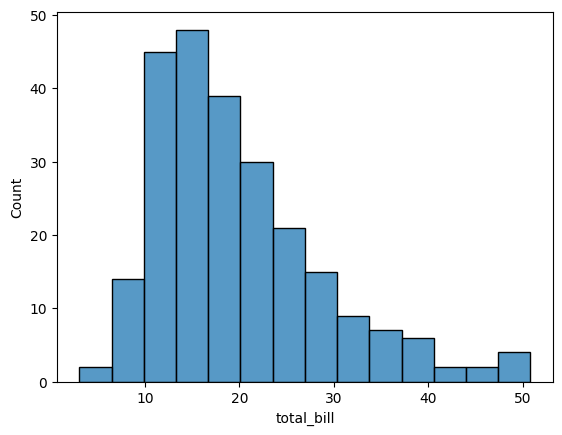

In [9]:
sns.histplot(df['total_bill'])

<Axes: ylabel='Count'>

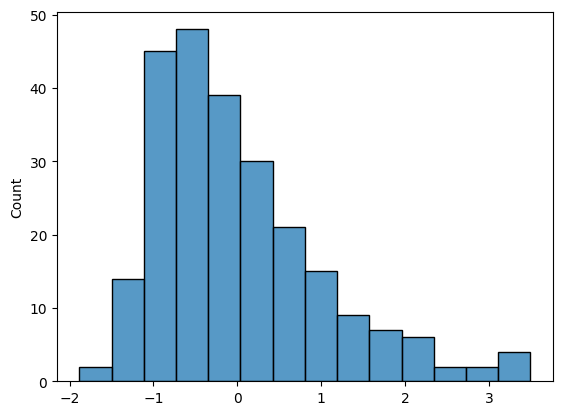

In [10]:
sns.histplot(normalized_data)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
scaler

StandardScaler()

In [16]:
# calculate require mean and std
scaler.fit(df[['total_bill']])

StandardScaler()

In [17]:
# calculate z-score
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
# combine fit_transform in one line

import pandas as pd
pd.DataFrame(scaler.fit_transform(df[['total_bill']]),columns=['total_bill'])

,total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [22]:
# two columns calculation
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [23]:
# add new value to data set 
scaler.transform([[13,4]])

c:\Users\Hp\miniconda3\envs\env-01\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

#### NORMALIZATON - (MIN-MAX SCALING)

In [24]:
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
min_max=MinMaxScaler()

In [27]:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [31]:
# CALCULATE PARAMETER REQUIRED MIN, MAX
min_max.fit(df[['distance','fare','tip']])

MinMaxScaler()

In [29]:
min_max.transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [30]:
min_max.transform([[1.6,7.0,2.15]])

c:\Users\Hp\miniconda3\envs\env-01\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04359673, 0.04026846, 0.06475904]])

#### UNIT VECTOR

In [32]:
from sklearn.preprocessing import normalize

In [33]:
pd.DataFrame(normalize(df[['distance','fare','tip']]))

,0,1,2
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000
